In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dados_pessoas = pd.read_csv('cardio_train.csv', sep=',', index_col=0)

In [ ]:
dados_pessoas

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Análise Geral dos Dados
| Feature                                       | Variable Type       | Variable    | Value Type                                       |   |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|---|
| Age                                           | Objective Feature   | age         | int (days)                                       |   |
| Height                                        | Objective Feature   | height      | int (cm)                                         |   |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |   |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |   |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |   |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |   |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |   |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |   |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |   |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |   |
| Physical activity                             | Subjective Feature  | active      | binary                                           |   |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |   |

In [ ]:
dados_pessoas.info() #checamos se os dados foram interpretados com o tipo de dado correto

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [ ]:
dados_pessoas.describe() #analisamos os dados estatísticos de cada variável
#note que colunas categóricas não faz sentido média e desvio padrão.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dados_pessoas.isna().sum() #como Python interpreta True como 1 e False como 0, caso tenha valores nulos, a soma para cada coluna dará diferente de 0.

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# 2. Análise Exploratória dos Dados

In [ ]:
dados_pessoas.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

### 2.1 Dados numéricos

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots (rows=4, cols=1) #cria espaço com 4 linhas
fig.add_trace(go.Box(x=dados_pessoas['age']/365, name = 'Idade'), row=1, col=1) #cria na primeira linha um boxplot sobre a idade dos pacientes
fig.add_trace(go.Box(x=dados_pessoas['weight'], name = 'Massa(kg)'), row=2, col=1)
fig.add_trace(go.Box(x=dados_pessoas['ap_hi'], name = 'Pressão sanguínea sistólica'), row=3, col=1)
fig.add_trace(go.Box(x=dados_pessoas['ap_lo'], name = 'Pressão sanguínea diastólica'), row=4, col=1)
fig.update_layout(height = 700)
fig.show()

### 2.2 Dados categóricos

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots (rows=2, cols=3)
fig.add_trace(go.Bar(y= dados_pessoas['gender'].value_counts(), x = ['Feminino', 'Masculino'], name='Gênero'), row=1, col=1)
fig.add_trace(go.Bar(y= dados_pessoas['cholesterol'].value_counts(), x = ['Normal', 'Acima do Normal', 'Muito Acima do Normal'], name='Colesterol'), row=1, col=2)
fig.add_trace(go.Bar(y= dados_pessoas['gluc'].value_counts(), x = ['Normal', 'Acima do Normal', 'Muito Acima do Normal'], name='Glicose'), row=1, col=3)
fig.add_trace(go.Bar(y= dados_pessoas['smoke'].value_counts(), x = ['Não Fumante', 'Fumante'], name='Fumante'), row=2, col=1)
fig.add_trace(go.Bar(y= dados_pessoas['alco'].value_counts(), x = ['Não Alcoólatra', 'Alcoólatra'], name='Alcoólatra'), row=2, col=2)
fig.add_trace(go.Bar(y= dados_pessoas['active'].value_counts(), x = ['Não Ativo', 'Ativo'], name='Ativo Fisicamente'), row=2, col=3)
fig.update_layout(template='plotly_dark', height=700, width=1600)
fig.show()

In [ ]:
dados_pessoas['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:
dados_pessoas.groupby(['smoke', 'cardio']).count()['id']
#quantas pessoas que não fumam-não são cardíacas, não fumam - são cardiácas, fumam - não são cardíacas, fumam - são cardíacas.

smoke  cardio
0      0         31781
       1         32050
1      0          3240
       1          2929
Name: id, dtype: int64

# 3. Aplicando Machine Learning


###3.1 Preparação dos Dados

In [ ]:
Y = dados_pessoas['cardio'] #a coluna que diz se a pessoa tem ou não problemas cardíacos -> o que queremos descobrir
X = dados_pessoas.loc[:, dados_pessoas.columns != 'cardio'] #demais colunas (todas as linhas das demais colunas | :)

In [ ]:
from sklearn.model_selection import train_test_split
#selecionaremos 67% para serem dados de treino e 33% (test_size = 0.33) para serem dados de teste
#random_state = 42 -> defini a semente como 42 para obter os mesmos dados do tutorial.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

###3.2 Treinamento do Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_ml = RandomForestClassifier(n_estimators=20, n_jobs=4, max_depth=4)
#n_estimators -> o número de árvores de decisão no modelo.
#n_jobs -> o número de núcleos do processador em paralelo que o modelo pode usar para treinar as árvores de decisão
#max_depth -> a profundidade máxima das árvores de decisão no modelo
modelo_ml.fit(x_train, y_train) #treina o modelo com os dados de treinamento

RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=4)

###3.3 Avaliação do Modelo

In [ ]:
#Apenas a título de exemplo, vou testar com uma pessoa só
numero_pessoa = 1
if modelo_ml.predict(x_test.iloc[numero_pessoa].to_frame().transpose()) == 1:
  previsao_modelo = 'tem problema cardíaco'
else:
  previsao_modelo = 'NÃO tem problema cardíaco'

if y_train.iloc[numero_pessoa] == 1:
  eh_cardiaca = 'tem problema cardíaco'
else:
  eh_cardiaca = 'NÃO tem problema cardíaco'

print (f'O modelo previu que a pessoa {previsao_modelo} e ela {eh_cardiaca}')

O modelo previu que a pessoa tem problema cardíaco e ela NÃO tem problema cardíaco


In [ ]:
predictions = modelo_ml.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions)) # -> 73% de precisão || pode ser melhorado
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     11506
           1       0.77      0.67      0.72     11594

    accuracy                           0.73     23100
   macro avg       0.74      0.73      0.73     23100
weighted avg       0.74      0.73      0.73     23100

[[9158 2348]
 [3822 7772]]


##### **Relatório de Classificação**
O classification report é uma das principais métricas para avaliar a performance de um modelo de classificação. Ele é uma tabela que apresenta várias métricas de avaliação, tais como acurácia (accuracy), precisão (precision), recall (revocação) e F1-score para cada classe.

O classification report é gerado pelo Scikit-learn (sklearn) e é calculado a partir da matriz de confusão. Ele apresenta informações sobre como o modelo está performando em cada classe, permitindo uma análise mais detalhada da performance do modelo em relação a cada classe.

O formato do classification report é o seguinte:


```
               precision    recall  f1-score   support

  classe 1     0.80      0.90      0.85       100
  classe 2     0.75      0.60      0.67        50
  classe 3     0.70      0.75      0.72        75

    micro avg  0.77      0.77      0.77       225
    macro avg  0.75      0.75      0.74       225
 weighted avg  0.77      0.77      0.76       225

```
Na tabela acima, temos as métricas de precisão (precision), recall (revocação) e F1-score para cada classe. Além disso, temos a quantidade de instâncias em cada classe (support), o valor da acurácia para todas as classes (micro avg), a média ponderada das métricas para todas as classes (weighted avg) e a média aritmética das métricas para todas as classes (macro avg).

A precisão (precision) mede a proporção de instâncias classificadas como positivas que realmente são positivas. Já o recall (revocação) mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. O F1-score é uma média harmônica entre a precisão e o recall e é uma medida de equilíbrio entre essas duas métricas.

O classification report é uma ferramenta importante para avaliar a performance do modelo em cada classe, permitindo uma análise mais detalhada da performance do modelo em relação a cada classe. Ele é especialmente útil quando há um desbalanceamento entre as classes, ou quando uma classe é mais importante do que as outras em um problema de classificação.

##### **Matriz de confusão**

A matriz de confusão é uma tabela usada para avaliar a performance de um modelo de classificação. Ela mostra a frequência com que as classes do modelo foram previstas corretamente e incorretamente.

A matriz de confusão tem quatro elementos principais:

Verdadeiro Positivo (VP): quando uma instância pertence à classe positiva e é corretamente classificada pelo modelo como positiva.
Falso Positivo (FP): quando uma instância pertence à classe negativa, mas é incorretamente classificada pelo modelo como positiva.
Verdadeiro Negativo (VN): quando uma instância pertence à classe negativa e é corretamente classificada pelo modelo como negativa.
Falso Negativo (FN): quando uma instância pertence à classe positiva, mas é incorretamente classificada pelo modelo como negativa.
A matriz de confusão é uma tabela 2x2 que coloca os resultados do modelo em relação à classe real. A tabela é organizada da seguinte forma:
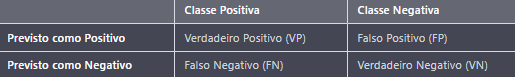

Com base nos valores de VP, FP, FN e VN, podemos calcular várias métricas de avaliação, como a acurácia (accuracy), a precisão (precision), o recall (revocação), o F1-score e a área sob a curva ROC (AUC-ROC). Essas métricas nos ajudam a entender quão bem o modelo está classificando as instâncias em cada classe.

Em geral, uma boa performance do modelo é quando temos valores altos de VP e VN, e baixos valores de FP e FN. Já uma performance ruim do modelo é quando temos valores altos de FP e FN, e baixos valores de VP e VN. A análise da matriz de confusão é uma ferramenta importante para entendermos como o nosso modelo está se comportando na tarefa de classificação.

###3.4 Feature Importance

In [ ]:
#Bagunça cada variável do estudo uma a uma e estima qual a queda de perfomance devido a isso.
#A variável que gerar maior queda é a mais importante para realizar a previsão 
from sklearn.inspection import permutation_importance
resultado = permutation_importance(modelo_ml, x_test, y_test, n_repeats=10, n_jobs=2)


In [ ]:
indice_ordenado = resultado.importances_mean.argsort()
# ordena as importâncias de permutação de forma crescente e retorna um array com os índices das features ordenadas.

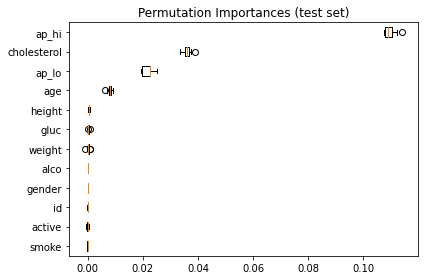

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(resultado.importances[indice_ordenado].T, vert=False, labels=x_test.columns[indice_ordenado])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()
#conseguimos perceber que a pressão sistólica afeta muita mais que as demais variáveis

In [ ]:
import shap
explainer = shap.TreeExplainer(modelo_ml)

In [ ]:
shap_values = explainer.shap_values(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


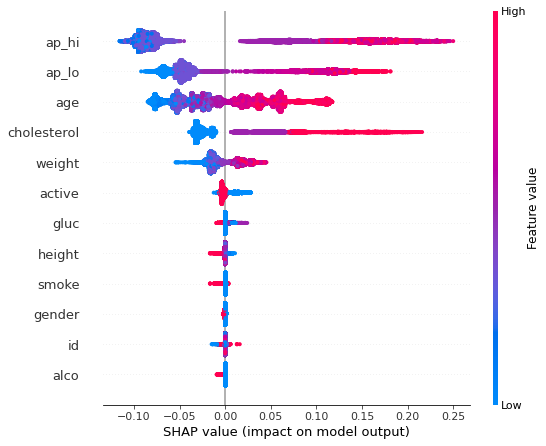

In [ ]:
shap.summary_plot(shap_values[1], X)
#variáveis a direita impactam positivamente no modelo. A esquerda, negativamente.
#Positivamente -> quando elas têm problema cardíaco.
#ou seja, quanto maior a pressão, a altura, o peso, colesterol e glicose, mais chances de ser cardíaco. 
# Já no quesito de ser ativa, em azul temos as pessoas não-ativas e que estão para direita, ou seja, pessoas não-ativas tendem às doenças cardíacas.

# 4. Conclusão

As pressões sanguíneas elevadas (em especial a sistólica) são os principais fatores de risco nesse estudo. Colesterol alto, idade avançada, peso elevado e glicose alta também constituem fatores de risco, embora menos relevantes que as pressões. 